# Sklearn 库

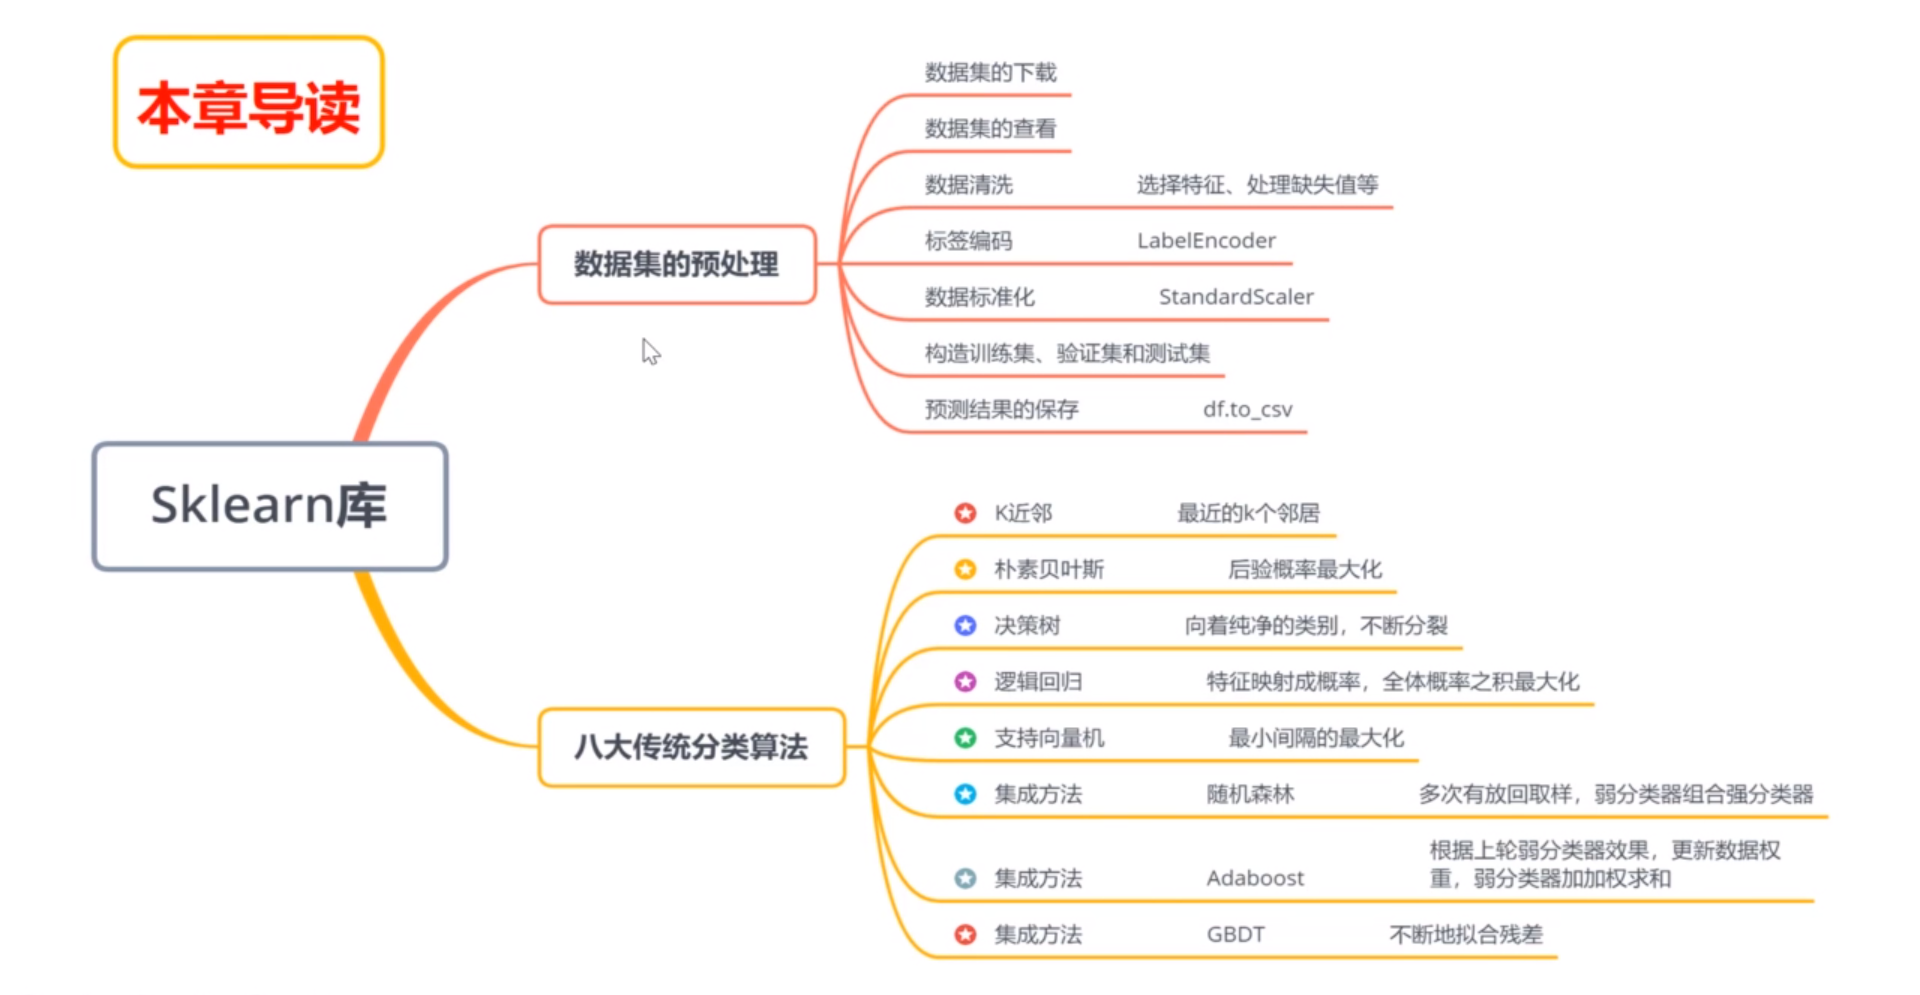

**scikit-learn库是当今最流行的机器学习算法库之一**

**可用来解决分类与回归问题**

**本章以鸢尾花数据集为例，简单了解八大传统机器学习分类算法的sk-learn实现**

**欲深入了解传统机器算法的原理和公式推导，请继续学习《统计学习方法》或《西瓜书》**

## 0）鸢尾花数据集

【1】下载数据集

In [2]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=18bc736eedbcf59a5b7fa5b3324ee8e460b6651fab4c26312418519a19753f5b
  Stored in directory: c:\users\11046\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [1]:
from sklearn import datasets
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

【2】数据集的查看

In [3]:
type(iris)

pandas.core.frame.DataFrame

In [4]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [9]:
iris.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

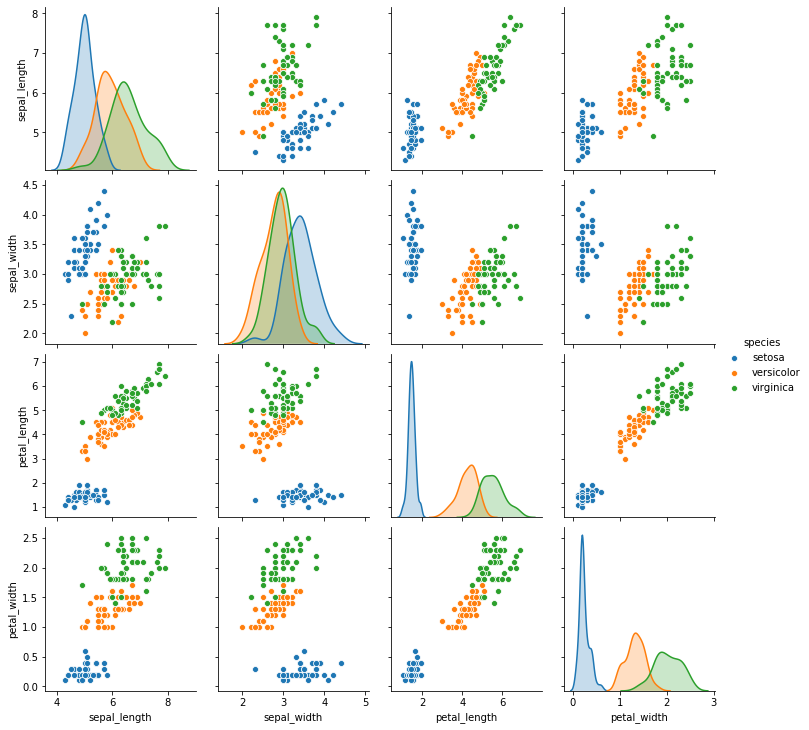

In [10]:
sns.pairplot(data=iris, hue='species')

【3】标签清洗

In [7]:
iris_simple = iris.drop(['sepal_length', 'sepal_width'], axis=1)    # 丢弃花萼的长度和宽度
iris_simple.head()

petal_length  petal_width species
0           1.4          0.2  setosa
1           1.4          0.2  setosa
2           1.3          0.2  setosa
3           1.5          0.2  setosa
4           1.4          0.2  setosa

【4】标签编码

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple['species'] = encoder.fit_transform(iris_simple['species'])

In [9]:
iris_simple

petal_length  petal_width  species
0             1.4          0.2        0
1             1.4          0.2        0
2             1.3          0.2        0
3             1.5          0.2        0
4             1.4          0.2        0
..            ...          ...      ...
145           5.2          2.3        2
146           5.0          1.9        2
147           5.2          2.0        2
148           5.4          2.3        2
149           5.1          1.8        2

[150 rows x 3 columns]

【5】数据集的标准化（本数据集特征比较接近，实际处理过程中未标准化）

In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [17]:
trans = StandardScaler()
_iris_simple = trans.fit_transform(iris_simple[['petal_length', 'petal_width']])
_iris_simple = pd.DataFrame(_iris_simple, columns=['petal_length', 'petal_width'])
_iris_simple.describe()

petal_length   petal_width
count  1.500000e+02  1.500000e+02
mean  -4.263256e-16 -4.736952e-16
std    1.003350e+00  1.003350e+00
min   -1.567576e+00 -1.447076e+00
25%   -1.226552e+00 -1.183812e+00
50%    3.364776e-01  1.325097e-01
75%    7.627583e-01  7.906707e-01
max    1.785832e+00  1.712096e+00

【6】构建训练集和测试集（暂不考虑验证集）

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_simple, test_size=0.2)
test_set.head()

petal_length  petal_width  species
53            4.0          1.3        1
86            4.7          1.5        1
84            4.5          1.5        1
144           5.7          2.5        2
139           5.4          2.1        2

In [11]:
iris_x_train = train_set[['petal_length', 'petal_width']]  # 剥离特征
iris_x_train.head()

petal_length  petal_width
13           1.1          0.1
96           4.2          1.3
63           4.7          1.4
6            1.4          0.3
51           4.5          1.5

In [12]:
iris_y_train = train_set['species'].copy()    # 注意使用 copy
iris_y_train.head()

13    0
96    1
63    1
6     0
51    1
Name: species, dtype: int32

In [13]:
iris_x_test = test_set[['petal_length', 'petal_width']]
iris_x_test.head()

petal_length  petal_width
53            4.0          1.3
86            4.7          1.5
84            4.5          1.5
144           5.7          2.5
139           5.4          2.1

In [14]:
iris_y_test = test_set['species'].copy()    # 注意使用 copy
iris_y_test.head()

53     1
86     1
84     1
144    2
139    2
Name: species, dtype: int32

## 1）k近邻算法

【1】基本思想

与待预测点最近的训练数据集中的k个邻居

把k个近邻中最常见的类别预测为待预测点的类别

【2】sklearn实现

In [15]:
from sklearn.neighbors import KNeighborsClassifier

- 构建分类器对象

In [16]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- 训练

In [17]:
clf.fit(iris_x_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- 预测

In [18]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 翻转

In [19]:
encoder.inverse_transform(res)     # 反编码

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor'],
      dtype=object)

- 评估

In [20]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：97%


- 存储数据

In [21]:
out = iris_x_test.copy()
out['y'] = iris_y_test
out['pre'] = res
out

petal_length  petal_width  y  pre
53            4.0          1.3  1    1
86            4.7          1.5  1    1
84            4.5          1.5  1    1
144           5.7          2.5  2    2
139           5.4          2.1  2    2
64            3.6          1.3  1    1
48            1.5          0.2  0    0
91            4.6          1.4  1    1
15            1.5          0.4  0    0
116           5.5          1.8  2    2
145           5.2          2.3  2    2
112           5.5          2.1  2    2
21            1.5          0.4  0    0
129           5.8          1.6  2    2
101           5.1          1.9  2    2
88            4.1          1.3  1    1
132           5.6          2.2  2    2
126           4.8          1.8  2    2
80            3.8          1.1  1    1
102           5.9          2.1  2    2
123           4.9          1.8  2    2
37            1.4          0.1  0    0
99            4.1          1.3  1    1
100           6.0          2.5  2    2
10            1.5          0.2  0    0
85            4.5          1.6  1    1
119           5.0          1.5  2    1
29            1.6          0.2  0    0
137           5.5          1.8  2    2
54            4.6          1.5  1    1

In [22]:
out.to_csv('iris_predict.csv')

【3】可视化

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw(clf):
    
    # 网格化（分成500*500个区域）
    M, N = 500, 500
    x1_min, x2_min = iris_simple[['petal_length', 'petal_width']].min(axis=0)
    x1_max, x2_max = iris_simple[['petal_length', 'petal_width']].max(axis=0)    
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)    
    x1, x2 = np.meshgrid(t1, t2)
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    y_predict = clf.predict(x_show)
    
    # 配色
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    
    # 绘制预测区域图
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)
    
    # 绘制原始数据点
    plt.scatter(iris_simple['petal_length'], iris_simple['petal_width'], label=None,
               c=iris_simple['species'], cmap=cm_dark, marker='o', edgecolors='k')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    
    # 绘制图例
    color = ['g', 'r', 'b']
    species = ['setosa', 'virginica', 'versicolor']
    for i in range(3):
        plt.scatter([], [], c=color[i], s=40, label=species[i])  # 利用空点绘制图例
    plt.legend(loc='best')
    plt.title('iris_classfier')

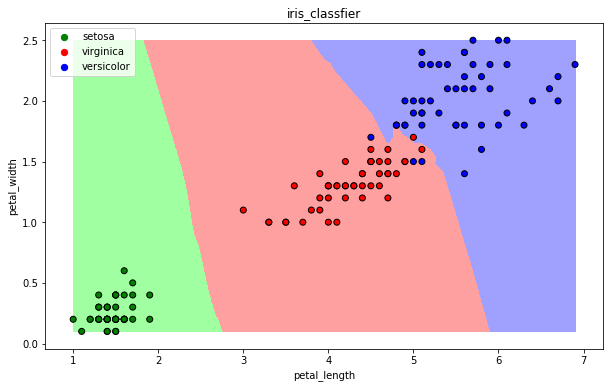

In [26]:
draw(clf)

## 2）朴素贝叶斯算法

【1】基本思想

当 X=(x1, x2) 发生的时候，哪一个yk发生的概率最大

【2】sklearn实现

In [27]:
from sklearn.naive_bayes import GaussianNB

- 构建分类器对象

In [28]:
clf = GaussianNB()
clf

GaussianNB(priors=None, var_smoothing=1e-09)

- 训练

In [29]:
clf.fit(iris_x_train, iris_y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

- 预测

In [30]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 评估

In [31]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：97%


- 可视化

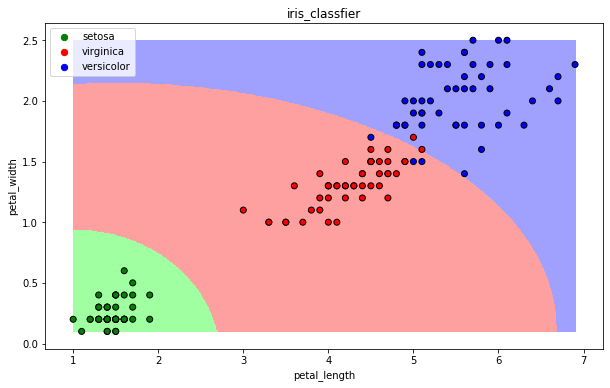

In [32]:
draw(clf)

## 3）决策树算法

【1】基本思想

CART算法：每次通过一个特征，将数据尽可能的分为纯净的两类，递归的分下去

【2】sklearn实现

In [33]:
from sklearn.tree import DecisionTreeClassifier

- 构建分类器对象

In [34]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

- 训练

In [35]:
clf.fit(iris_x_train, iris_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

- 预测

In [36]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 1 2 1 2 1 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 评估

In [37]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：90%


- 可视化

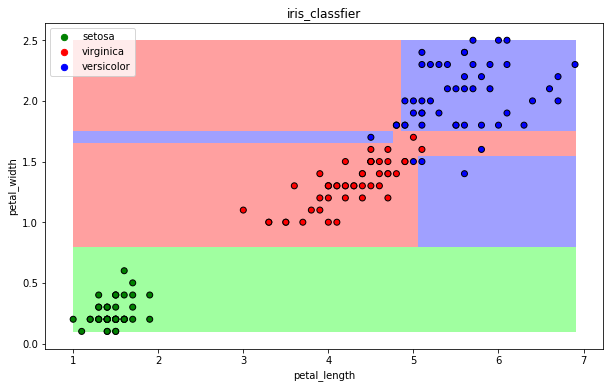

In [38]:
draw(clf)

## 4）逻辑回归算法

【1】基本思想

一种解释：

> 训练：通过一个映射方式，将特征 X=(x1, x2) 映射成 P(y=ck) ，求使得所有概率之积最大化的映射方式里的参数

> 预测：计算 P(y=ck) 取概率最大的那个类作为预测对象的分类

【2】sklearn实现

In [39]:
from sklearn.linear_model import LogisticRegression

- 构建分类器对象

In [40]:
clf = LogisticRegression(solver='saga', max_iter=1000)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

- 训练

In [41]:
clf.fit(iris_x_train, iris_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

- 预测

In [42]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 评估

In [43]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：97%


- 可视化

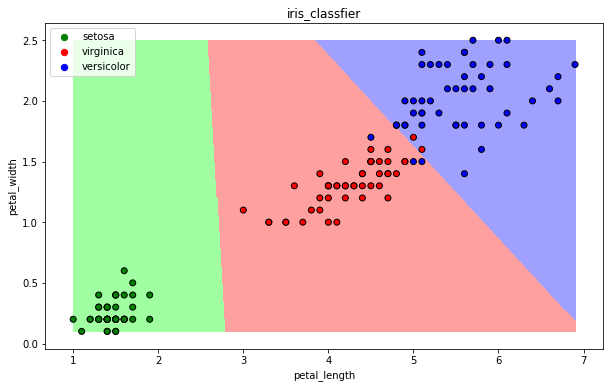

In [44]:
draw(clf)

## 5）支持向量机算法

【1】基本思想

以二分类为例，假设数据可以完全分开：

用一个超平面将两类数据完全分开，且最近点到平面的距离最大

【2】sklearn实现

In [45]:
from sklearn.svm import SVC

- 构建分类器对象

In [46]:
clf = SVC()
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- 训练

In [47]:
clf.fit(iris_x_train, iris_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- 预测

In [48]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 1 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 评估

In [49]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：93%


- 可视化

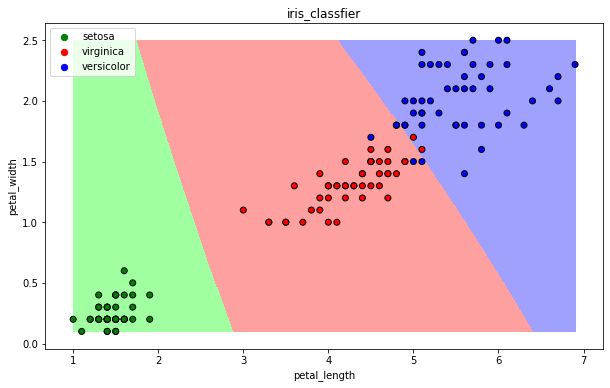

In [50]:
draw(clf)

## 7）集成方法——随机森林

【1】基本思想

训练集m，有放回的随机抽取m个数据，构成一组，共抽取n组采样集

n组采样集训练得到n个弱分类器，弱分类器一般用决策树或神经网络

将n个弱分类器进行组合得到强分类器

【2】sklearn实现

In [51]:
from sklearn.ensemble import RandomForestClassifier

- 构建分类器对象

In [52]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- 训练

In [53]:
clf.fit(iris_x_train, iris_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- 预测

In [54]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 评估

In [55]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：97%


- 可视化

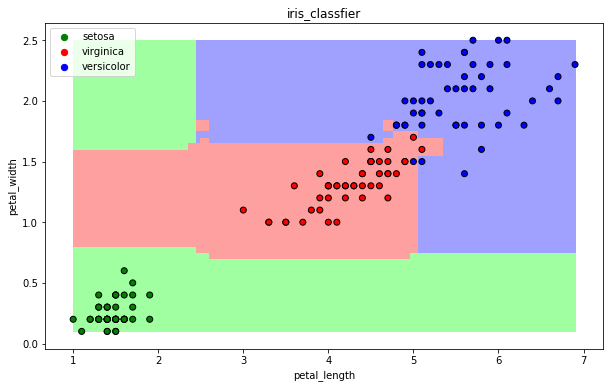

In [56]:
draw(clf)

## 7）集成方法——Adaboost

【1】基本思想

训练集m，用初始数据权重训练得到第一个弱分类器，根据误差率计算弱分类器系数，更新数据的权重

使用新的权重训练得到第二个弱分类器，以此类推

根据各自系数，将所有弱分类器加权求和获得强分类器

【2】sklearn实现

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

- 构建分类器对象

In [58]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

- 训练

In [59]:
clf.fit(iris_x_train, iris_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

- 预测

In [60]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 1 2 1 2 2 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 评估

In [61]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：93%


- 可视化

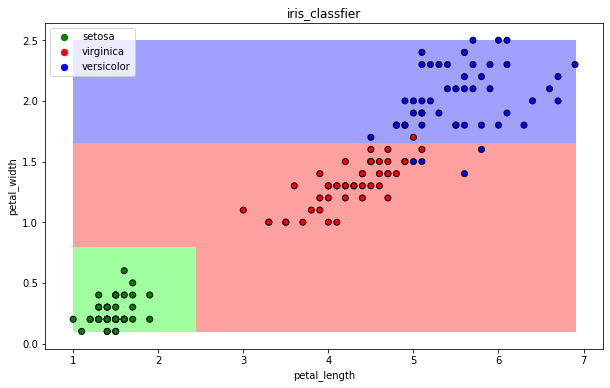

In [62]:
draw(clf)

## 8）集成方法——梯度提升树GBDT

【1】基本思想

训练集m，获得第一个弱分类器，获得残差，然后不断地拟合残差

所有弱分类器相加得到强分类器

【2】sklearn实现

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

- 构建分类器对象

In [64]:
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

- 训练

In [65]:
clf.fit(iris_x_train, iris_y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

- 预测

In [66]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 1 2 2 1 0 1 0 2 2 2 0 1 2 1 2 2 1 2 2 0 1 2 0 1 1 0 2 1]
[1 1 1 2 2 1 0 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 2 0 1 2 0 2 1]


- 评估

In [67]:
accuracy = clf.score(iris_x_test, iris_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：93%


- 可视化

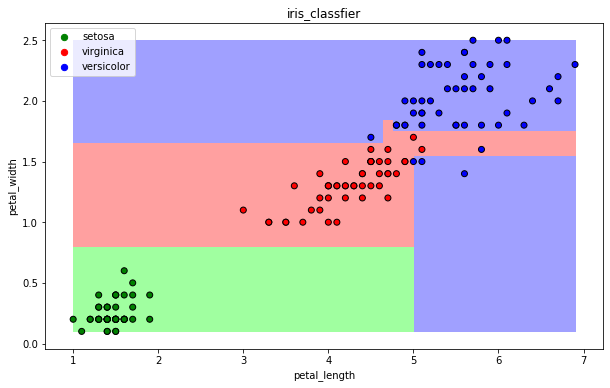

In [68]:
draw(clf)

## 9）大杀器

【1】xgboost

GBDT的损失函数只对误差部分做负梯度（一阶泰勒）展开

XGBoost损失函数对误差部分做二阶泰勒展开，更加准确，更快收敛

【2】lightgbm

微软：快速的，分布式的，高性能的基于决策树算法的梯度提升框架

速度更快

【3】stacking

堆叠或者叫模型融合

先建立几个简单的模型进行训练，第二级学习器会基于前级模型的预测结果进行再训练

【4】神经网络

---

# 题目

---

## 题目一 约会网站配对效果数据集的处理

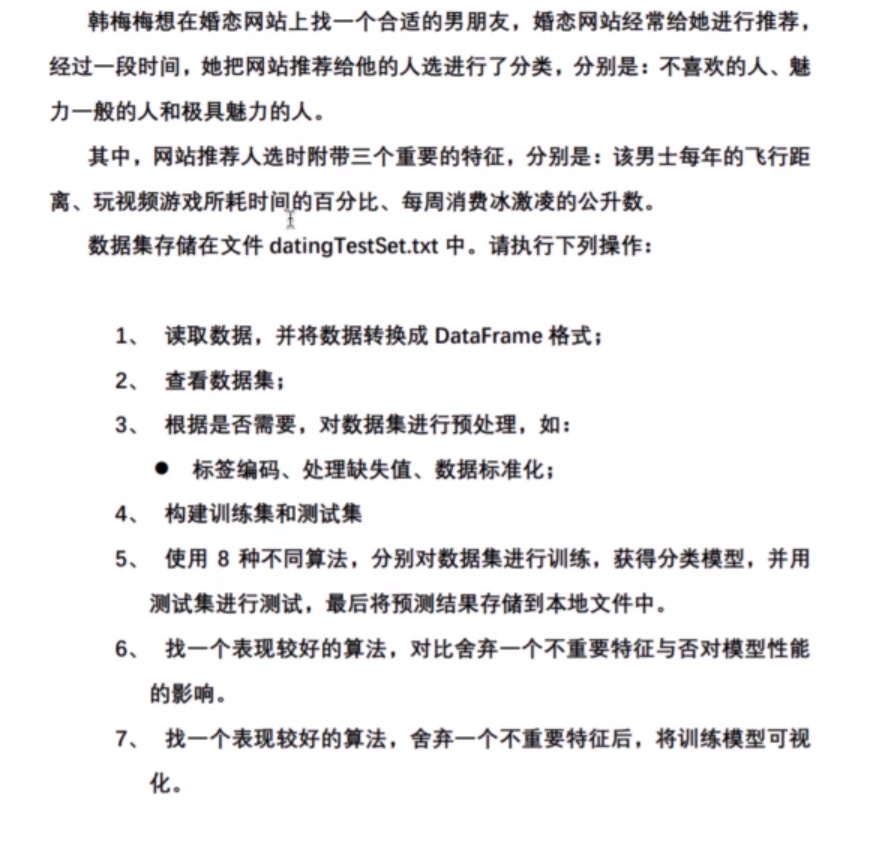

In [7]:
!pip install pandas-profiling

  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.8
    Uninstalling urllib3-1.25.8:
      Successfully uninstalled urllib3-1.25.8


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling as ppf
import seaborn as sns

### 1、读取数据，并将数据转换成 DataFrame 格式

In [29]:
def load_data(file_path):
    """
    导入数据
    ：param file_path：数据存储路径
    ：return：返回数据列表
    """
    f = open(file_path)
    data = []
    for line in f.readlines():
        row = []    # 记录每一行
        lines = line.strip().split('\t')
        for x in lines:
            row.append(x)
        data.append(row)
    f.close()
    return data

In [30]:
data = load_data('datingTestSet.txt')

In [31]:
data = pd.DataFrame(data, columns=['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数', '喜欢的程度'])

### 2、查看数据集 

In [32]:
data

每年的飞行距离 玩视频游戏所耗时间的百分比 每周消费冰激凌的公升数       喜欢的程度
0     40920      8.326976    0.953952  largeDoses
1     14488      7.153469    1.673904  smallDoses
2     26052      1.441871    0.805124   didntLike
3     75136     13.147394    0.428964   didntLike
4     38344      1.669788    0.134296   didntLike
..      ...           ...         ...         ...
995   11145      3.410627    0.631838  smallDoses
996   68846      9.974715    0.669787   didntLike
997   26575     10.650102    0.866627  largeDoses
998   48111      9.134528    0.728045  largeDoses
999   43757      7.882601    1.332446  largeDoses

[1000 rows x 4 columns]

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['喜欢的程度'] = encoder.fit_transform(data['喜欢的程度'])

In [34]:
data

每年的飞行距离 玩视频游戏所耗时间的百分比 每周消费冰激凌的公升数  喜欢的程度
0     40920      8.326976    0.953952      1
1     14488      7.153469    1.673904      2
2     26052      1.441871    0.805124      0
3     75136     13.147394    0.428964      0
4     38344      1.669788    0.134296      0
..      ...           ...         ...    ...
995   11145      3.410627    0.631838      2
996   68846      9.974715    0.669787      0
997   26575     10.650102    0.866627      1
998   48111      9.134528    0.728045      1
999   43757      7.882601    1.332446      1

[1000 rows x 4 columns]

In [35]:
data = data.astype(float)

In [36]:
data['喜欢的程度'] = data['喜欢的程度'].astype(int)

In [37]:
data['喜欢的程度'].value_counts()

0    342
2    331
1    327
Name: 喜欢的程度, dtype: int64

In [38]:
ppf.ProfileReport(data)

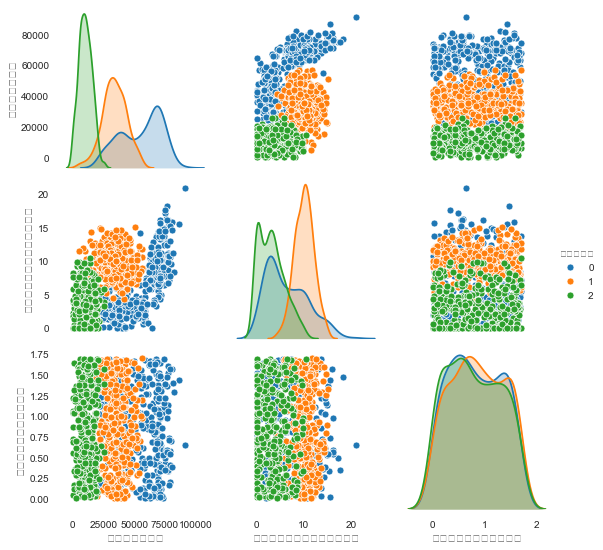

In [39]:
sns.pairplot(data=data, hue='喜欢的程度')    # 直接使用无法显示中文

In [40]:
# 解决sns.pairplot()中文问题
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font=myfont.get_name())

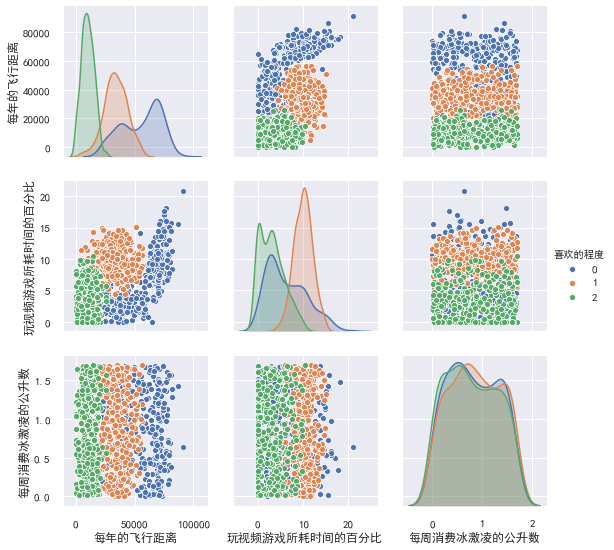

In [41]:
sns.pairplot(data=data, hue='喜欢的程度')    # 直接使用无法显示中文

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
每年的飞行距离          1000 non-null float64
玩视频游戏所耗时间的百分比    1000 non-null float64
每周消费冰激凌的公升数      1000 non-null float64
喜欢的程度            1000 non-null int64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [43]:
data.describe()

每年的飞行距离  玩视频游戏所耗时间的百分比  每周消费冰激凌的公升数        喜欢的程度
count   1000.000000    1000.000000  1000.000000  1000.000000
mean   33635.421000       6.559961     0.832073     0.989000
std    21957.006833       4.243618     0.497239     0.820702
min        0.000000       0.000000     0.001156     0.000000
25%    13796.000000       2.933963     0.408995     0.000000
50%    31669.000000       6.595204     0.809420     1.000000
75%    47716.250000      10.056500     1.272847     2.000000
max    91273.000000      20.919349     1.695517     2.000000

### 3、根据需要，对数据集进行预处理，如：

- 标签编码、处理缺失值、数据标准化

### 已编码，无缺失值，需要进行数据标准化

In [44]:
from sklearn.preprocessing import StandardScaler

In [46]:
trans = StandardScaler()
data_simple = trans.fit_transform(data[['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数']])
data_simple = pd.DataFrame(data, columns=['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数'])
data_simple.head(10)

每年的飞行距离  玩视频游戏所耗时间的百分比  每周消费冰激凌的公升数
0  40920.0       8.326976     0.953952
1  14488.0       7.153469     1.673904
2  26052.0       1.441871     0.805124
3  75136.0      13.147394     0.428964
4  38344.0       1.669788     0.134296
5  72993.0      10.141740     1.032955
6  35948.0       6.830792     1.213192
7  42666.0      13.276369     0.543880
8  67497.0       8.631577     0.749278
9  35483.0      12.273169     1.508053

In [47]:
data.head(10)

每年的飞行距离  玩视频游戏所耗时间的百分比  每周消费冰激凌的公升数  喜欢的程度
0  40920.0       8.326976     0.953952      1
1  14488.0       7.153469     1.673904      2
2  26052.0       1.441871     0.805124      0
3  75136.0      13.147394     0.428964      0
4  38344.0       1.669788     0.134296      0
5  72993.0      10.141740     1.032955      0
6  35948.0       6.830792     1.213192      1
7  42666.0      13.276369     0.543880      1
8  67497.0       8.631577     0.749278      0
9  35483.0      12.273169     1.508053      1

### 4、构建训练集和测试集

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_set, test_set = train_test_split(data, test_size=0.2)
train_set.head()

每年的飞行距离  玩视频游戏所耗时间的百分比  每周消费冰激凌的公升数  喜欢的程度
884  22239.0      11.265971     0.724054      1
494  66293.0      11.327910     0.780977      0
491  69306.0       6.683796     1.456317      0
106  40131.0      12.446578     0.300754      1
28    6808.0       1.364838     0.640103      2

In [50]:
data_x_train = train_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数']]
data_y_train = train_set['喜欢的程度'].copy()

In [51]:
data_x_train.head()

每年的飞行距离  玩视频游戏所耗时间的百分比  每周消费冰激凌的公升数
884  22239.0      11.265971     0.724054
494  66293.0      11.327910     0.780977
491  69306.0       6.683796     1.456317
106  40131.0      12.446578     0.300754
28    6808.0       1.364838     0.640103

In [52]:
data_y_train.head()

884    1
494    0
491    0
106    1
28     2
Name: 喜欢的程度, dtype: int64

In [53]:
data_x_test = test_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数']]
data_y_test = test_set['喜欢的程度'].copy()

### 5、使用八种不同算法，分别对数据集进行训练，获得分类模型，并用测试集进行测试，最后将预测结果存储到本地文件中

#### 5.1 k近邻算法

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
clf = KNeighborsClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [56]:
print(res)
print(data_y_test.values)

[2 2 1 2 0 0 0 2 0 0 1 1 1 0 0 0 2 0 1 1 2 1 0 1 2 0 2 0 0 2 2 1 0 0 2 2 2
 0 0 2 1 1 0 0 2 0 2 2 0 2 2 2 0 1 2 0 1 1 2 2 0 1 2 2 1 1 1 2 0 2 0 0 1 0
 1 2 2 2 0 2 0 0 0 0 0 1 1 2 2 1 2 1 1 2 1 2 2 2 2 1 1 2 0 0 2 0 1 2 0 2 2
 0 2 1 2 0 2 2 0 1 2 1 2 0 1 1 2 0 0 1 1 2 0 1 2 1 0 2 1 1 0 1 2 0 2 2 0 1
 2 1 0 0 0 0 0 1 1 2 0 1 1 1 0 1 1 2 0 1 2 2 0 1 1 1 2 1 1 2 0 2 0 0 1 0 1
 2 1 2 0 2 2 1 0 1 0 1 1 0 2 1]
[2 2 1 2 1 1 1 2 0 0 0 1 0 1 0 1 2 0 0 1 2 1 0 1 2 0 2 1 0 2 1 1 1 1 2 2 2
 0 0 2 0 1 0 0 2 0 2 2 0 2 2 2 0 0 2 0 1 0 2 1 0 2 2 2 0 1 0 2 0 2 1 0 1 0
 0 2 1 2 1 1 1 0 0 0 0 1 0 2 2 1 2 1 0 2 0 2 1 2 2 0 0 2 0 0 1 0 1 2 0 2 2
 0 2 1 2 1 2 2 0 1 2 0 2 0 1 1 2 1 0 1 0 2 0 1 2 0 0 2 1 1 0 1 2 0 2 2 0 1
 2 0 0 0 0 1 0 0 1 2 0 0 0 1 0 1 0 2 0 1 2 2 0 0 1 1 2 1 0 2 0 2 0 1 1 0 1
 2 0 2 0 2 2 1 0 2 0 1 1 1 2 1]


In [57]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：76%


In [58]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_KNeighbors.csv')

#### 5.2 朴素贝叶斯算法

In [59]:
from sklearn.naive_bayes import GaussianNB

In [61]:
clf = GaussianNB()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [62]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：92%


In [63]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_bayes.csv')

#### 5.3 决策树算法

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
clf = DecisionTreeClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [66]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：94%


In [67]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_tree.csv')

#### 5.4 逻辑回归算法

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
clf = LogisticRegression()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [70]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：60%


In [71]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_linear.csv')

#### 5.5 支持向量机算法

In [72]:
from sklearn.svm import SVC

In [73]:
clf = SVC()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [74]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：75%


In [75]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_SVM.csv')

#### 5.6 集成方法——随机森林

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
clf = RandomForestClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [78]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：96%


In [79]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_Forest.csv')

#### 5.7 集成方法——Adaboost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
clf = AdaBoostClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [82]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：80%


In [83]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_Adaboost.csv')

#### 5.8 集成方法——梯度提升树GBDT

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
clf = GradientBoostingClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [86]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：95%


In [87]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_GBDT.csv')

### 6、找一个表现较好的算法，对比舍弃一个不重要特征与否对模型性能的影响

In [88]:
data = data.drop(['每周消费冰激凌的公升数'], axis=1)
data_simple = trans.fit_transform(data[['每年的飞行距离', '玩视频游戏所耗时间的百分比']])
data_simple = pd.DataFrame(data, columns=['每年的飞行距离', '玩视频游戏所耗时间的百分比'])
data_simple.head(10)

每年的飞行距离  玩视频游戏所耗时间的百分比
0  40920.0       8.326976
1  14488.0       7.153469
2  26052.0       1.441871
3  75136.0      13.147394
4  38344.0       1.669788
5  72993.0      10.141740
6  35948.0       6.830792
7  42666.0      13.276369
8  67497.0       8.631577
9  35483.0      12.273169

In [89]:
data.head()

每年的飞行距离  玩视频游戏所耗时间的百分比  喜欢的程度
0  40920.0       8.326976      1
1  14488.0       7.153469      2
2  26052.0       1.441871      0
3  75136.0      13.147394      0
4  38344.0       1.669788      0

In [90]:
train_set, test_set = train_test_split(data, test_size=0.2)
train_set.head()

每年的飞行距离  玩视频游戏所耗时间的百分比  喜欢的程度
48   27268.0       4.398172      0
522  44432.0       8.346618      1
830  21704.0      10.098356      1
577  23535.0      10.049077      1
956  10583.0       0.000000      2

In [91]:
data_x_train = train_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比']]
data_y_train = train_set['喜欢的程度'].copy()

In [92]:
data_x_train.head()

每年的飞行距离  玩视频游戏所耗时间的百分比
48   27268.0       4.398172
522  44432.0       8.346618
830  21704.0      10.098356
577  23535.0      10.049077
956  10583.0       0.000000

In [93]:
data_y_train.head()

48     0
522    1
830    1
577    1
956    2
Name: 喜欢的程度, dtype: int64

In [94]:
data_x_test = test_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比']]
data_y_test = test_set['喜欢的程度'].copy()

In [95]:
clf = GradientBoostingClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [96]:
accuracy = clf.score(data_x_test, data_y_test)
print('预测正确率：{:.0%}'.format(accuracy))

预测正确率：97%


In [97]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_GBDT_dropped.csv')

### 7、找一个表现较好的算法，舍弃一个不重要特征后，将训练模型可视化

In [100]:
def draw(clf):
    
    # 网格化（分成500*500个区域）
    M, N = 500, 500
    x1_min, x2_min = data_simple[['每年的飞行距离', '玩视频游戏所耗时间的百分比']].min(axis=0)
    x1_max, x2_max = data_simple[['每年的飞行距离', '玩视频游戏所耗时间的百分比']].max(axis=0)    
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)    
    x1, x2 = np.meshgrid(t1, t2)
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    y_predict = clf.predict(x_show)
    
    # 配色
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    
    # 绘制预测区域图
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)
    
    # 绘制原始数据点
    plt.scatter(data_simple['每年的飞行距离'], data_simple['玩视频游戏所耗时间的百分比'], label=None,
               c=data['喜欢的程度'], cmap=cm_dark, marker='o', edgecolors='k')
    plt.xlabel('每年的飞行距离')
    plt.ylabel('玩视频游戏所耗时间的百分比')
    
    # 绘制图例
    color = ['g', 'r', 'b']
    species = ['0', '2', '1']
    for i in range(3):
        plt.scatter([], [], c=color[i], s=40, label=species[i])  # 利用空点绘制图例
    plt.legend(loc='best')
    plt.title('data_classfier')

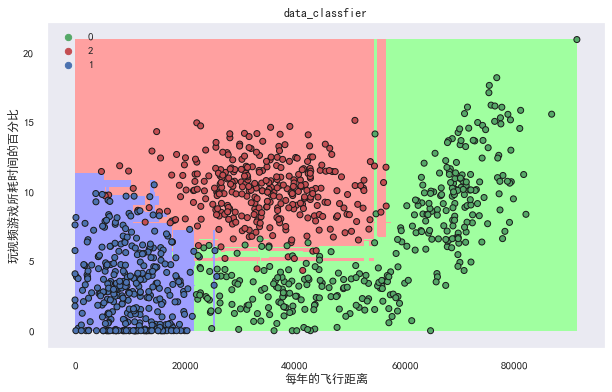

In [101]:
draw(clf)